In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("daily_food_nutrition_dataset.csv")

In [3]:
df.describe()

,User_ID,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,Water_Intake
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [4]:
# Select important features
df = df[["Food_Item", "Category", "Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol"]]

In [5]:
df.head()

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148


In [6]:
# count of null values in each feature
df.isnull().sum()

Food_Item        0
Category         0
Calories         0
Protein          0
Carbohydrates    0
Fat              0
Fiber            0
Sugars           0
Sodium           0
Cholesterol      0
dtype: int64

In [7]:
# Set a seed for consistent results
df = df.copy()
np.random.seed(42)

# Add random 0 or 1 for each example (row)
df["diabetes"] = np.random.randint(0, 2, size = len(df))
df["obesity"] = np.random.randint(0, 2, size = len(df))
df["bp"] = np.random.randint(0, 2, size = len(df))

# Show sample
df[["Food_Item", "Category", "Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "bp", "obesity"]].head(10)

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,bp,obesity
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,0,0,0
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,1,1,1
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,0,1,0
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,0,1,1
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,0,0,1
5,Oats,Grains,387,31.2,6.8,39.5,5.1,0.7,300,244,1,1,0
6,Carrot,Vegetables,138,28.2,12.4,20.2,2.8,37.8,933,15,0,1,1
7,Cookies,Snacks,69,36.8,17.8,15.0,9.6,36.4,185,228,0,0,1
8,Apple,Fruits,568,6.7,7.0,23.4,6.4,46.9,336,129,0,0,0
9,Quinoa,Grains,204,19.3,62.7,31.8,6.8,40.3,887,135,1,0,0


In [8]:
def is_healthy(row):
    """
    Health classification based on your dataset patterns
    Returns 1 for healthy, 0 for unhealthy
    """
    score = 100
    
    # Calorie penalties
    if row["Calories"] > 500:
        score -= 30
    elif row["Calories"] > 400:
        score -= 15
    
    # Fat penalties
    if row["Fat"] > 40:
        score -= 25
    elif row["Fat"] > 30:
        score -= 10
    
    # Sugar penalties
    if row["Sugars"] > 40:
        score -= 25
    elif row["Sugars"] > 25:
        score -= 10
    
    # Sodium penalties
    if row["Sodium"] > 800:
        score -= 20
    elif row["Sodium"] > 500:
        score -= 10
    
    # Cholesterol penalties
    if row["Cholesterol"] > 200:
        score -= 15
    elif row["Cholesterol"] > 150:
        score -= 5
    
    # Fiber bonus
    if row["Fiber"] > 7:
        score += 10
    elif row["Fiber"] > 4:
        score += 5
    
    # Protein bonus
    if row["Protein"] > 35:
        score += 10
    elif row["Protein"] > 25:
        score += 5
    
    # Health condition specific restrictions
    if row.get("diabetes", False) and row["Sugars"] > 15:
        score -= 20
    
    if row.get("bp", False) and row["Sodium"] > 300:
        score -= 20
    
    if row.get("obesity", False) and (row["Calories"] > 350 or row["Fat"] > 25):
        score -= 20
    
    # Category adjustments
    category = row.get("Category", "")
    if category == "Vegetables":
        score += 15
    elif category == "Fruits":
        score += 10
    elif category == "Snacks":
        score -= 10
    elif category == "Beverages" and row["Calories"] > 200:
        score -= 15
    
    # Return 1 if healthy (score >= 65), 0 if unhealthy
    return 1 if score >= 65 else 0

In [9]:
# Apply the healthy check on all examples
df = df.copy()
df["healthy"] = df.apply(is_healthy, axis = 1)

In [10]:
df

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp,healthy
0,Eggs,Meat,173,42.4,83.7,1.5,1.5,12.7,752,125,0,0,0,1
1,Apple,Fruits,66,39.2,13.8,3.2,2.6,12.2,680,97,1,1,1,1
2,Chicken Breast,Meat,226,27.1,79.1,25.8,3.2,44.7,295,157,0,0,1,1
3,Banana,Fruits,116,43.4,47.1,16.1,6.5,44.1,307,13,0,1,1,1
4,Banana,Fruits,500,33.9,75.8,47.0,7.8,19.4,358,148,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Salmon,Meat,346,29.8,55.6,4.6,1.7,0.5,976,87,1,0,1,1
9996,Grapes,Fruits,174,22.9,54.9,32.1,2.5,5.9,255,56,0,0,1,1
9997,Strawberry,Fruits,63,36.5,23.8,21.6,0.8,48.9,757,63,1,0,1,0
9998,Spinach,Vegetables,564,26.2,58.9,11.9,3.3,43.0,482,33,1,1,1,0


In [11]:
df.to_csv("processed_nutrition_data_with_disease.csv")

In [11]:
df["healthy"].value_counts()

healthy
0    6154
1    3846
Name: count, dtype: int64

# 1. Countplot of Healthy vs Unhealthy

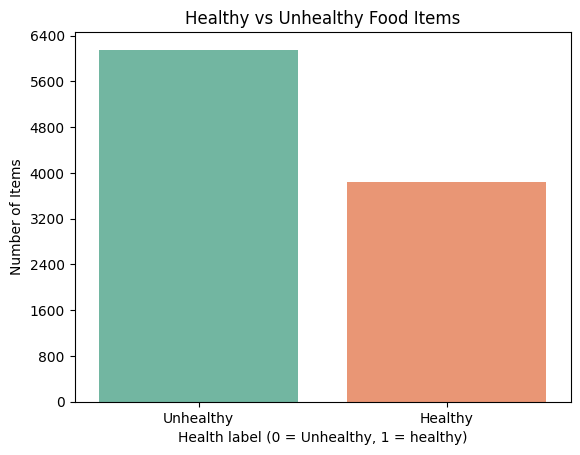

In [12]:
sns.countplot(x="healthy", hue="healthy", data=df, palette="Set2", legend=False)
plt.title("Healthy vs Unhealthy Food Items")
plt.xlabel("Health label (0 = Unhealthy, 1 = healthy)")
plt.ylabel("Number of Items")
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks([0, 1], ['Unhealthy', 'Healthy'])
plt.show()

# Model Training

# 1. Define Features X  and Target y

In [13]:
# Feature columns (X) and Target (y)
X = df[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y = df["healthy"]

# 2. Scaling the Features and Training the model 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.97791911,  1.19429683,  1.13677417, ..., -0.99740337,
        -0.99860098, -1.00742758],
       [-1.65433456,  0.96784893, -1.41564515, ...,  1.00260339,
         1.00140098,  0.99262718],
       [-0.6428722 ,  0.11159282,  0.9688038 , ..., -0.99740337,
        -0.99860098,  0.99262718],
       ...,
       [-1.67329948,  0.77678351, -1.05049217, ...,  1.00260339,
        -0.99860098,  0.99262718],
       [ 1.49384203,  0.04790435,  0.23119478, ...,  1.00260339,
         1.00140098,  0.99262718],
       [ 0.72260198, -0.32714999, -0.92268863, ..., -0.99740337,
        -0.99860098, -1.00742758]])

# 3. Splitting the dataset into train and test samples

In [15]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# 4. Model Training using Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# 5. Model Evaluation and Prediction

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

#Accuracy test
print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))



Accuracy:  0.8415
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      1204
           1       0.80      0.80      0.80       796

    accuracy                           0.84      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix: 
 [[1045  159]
 [ 158  638]]


# 6. Testing on random sample 

In [18]:

# Generate 1 random test sample
random_sample = pd.DataFrame({
    "Calories": [np.random.randint(50, 800)],
    "Protein": [round(np.random.uniform(0, 50), 1)],
    "Carbohydrates": [round(np.random.uniform(0, 100), 1)],
    "Fat": [round(np.random.uniform(0, 70), 1)],
    "Fiber": [round(np.random.uniform(0, 30), 1)],
    "Sugars": [round(np.random.uniform(0, 50), 1)],
    "Sodium": [np.random.randint(0, 2500)],
    "Cholesterol": [np.random.randint(0, 300)],
    "diabetes": [np.random.randint(0, 2)],
    "obesity": [np.random.randint(0, 2)],
    "bp": [np.random.randint(0, 2)]
})

print("Random Test Sample:\n", random_sample)


Random Test Sample:
    Calories  Protein  Carbohydrates  Fat  Fiber  Sugars  Sodium  Cholesterol  \
0       327     37.3           56.3  5.8    5.6    11.0    1090          210   

   diabetes  obesity  bp  
0         1        0   0  


In [19]:
random_sample

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp
0,327,37.3,56.3,5.8,5.6,11.0,1090,210,1,0,0


In [20]:
random_sample["healthy"] = random_sample.apply(is_healthy, axis = 1)

In [21]:
random_sample

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp,healthy
0,327,37.3,56.3,5.8,5.6,11.0,1090,210,1,0,0,1


In [22]:
X_test_sample = random_sample[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y_test_sample = random_sample[["healthy"]]

In [23]:
X_sample_scaled = scaler.transform(X_test_sample) # for 1 sample
X_sample_scaled

array([[-0.00438659,  0.83339549,  0.13625501, -1.38832718,  0.21399443,
        -0.97048931,  2.05585164,  0.66524586,  1.00260339, -0.99860098,
        -1.00742758]])

In [24]:
y_pred_test = model.predict(X_sample_scaled)

In [25]:
y_pred_test[0]

np.int64(1)

In [26]:
y_test_sample["healthy"][0] 

np.int64(1)

In [27]:
import pandas as pd

sample = pd.DataFrame([{
    "Calories": 280,
    "Protein": 30.0,
    "Carbohydrates": 35.0,
    "Fat": 10.0,
    "Fiber": 8.0,
    "Sugars": 12.0,
    "Sodium": 250,
    "Cholesterol": 40,
    "diabetes": 0,
    "obesity": 0,
    "bp": 0,
    "Category": "Vegetables"
}])

# Add the label
sample["healthy"] = sample.apply(is_healthy, axis=1)
print(sample)


   Calories  Protein  Carbohydrates   Fat  Fiber  Sugars  Sodium  Cholesterol  \
0       280     30.0           35.0  10.0    8.0    12.0     250           40   

   diabetes  obesity  bp    Category  healthy  
0         0        0   0  Vegetables        1  


In [28]:
X_test_sample_0 = sample[["Calories", "Protein", "Carbohydrates", "Fat", "Fiber", "Sugars", "Sodium", "Cholesterol", "diabetes", "obesity", "bp"]]
y_test_sample_0 = sample[["healthy"]]

In [29]:
X_test_sample_0
# y_test_sample_0

,Calories,Protein,Carbohydrates,Fat,Fiber,Sugars,Sodium,Cholesterol,diabetes,obesity,bp
0,280,30.0,35.0,10.0,8.0,12.0,250,40,0,0,0


In [30]:
X_test_sample_0_scaled = scaler.transform(X_test_sample_0)
X_test_sample_0_scaled

array([[-0.30150365,  0.31681122, -0.64152083, -1.09139434,  1.05173728,
        -0.90142797, -0.8610824 , -1.28080782, -0.99740337, -0.99860098,
        -1.00742758]])

In [31]:
y_pred_test_1 = model.predict(X_test_sample_0_scaled)
print("Predicted: ", y_pred_test_1[0])
print("Actual: ", y_test_sample_0["healthy"][0])

Predicted:  1
Actual:  1


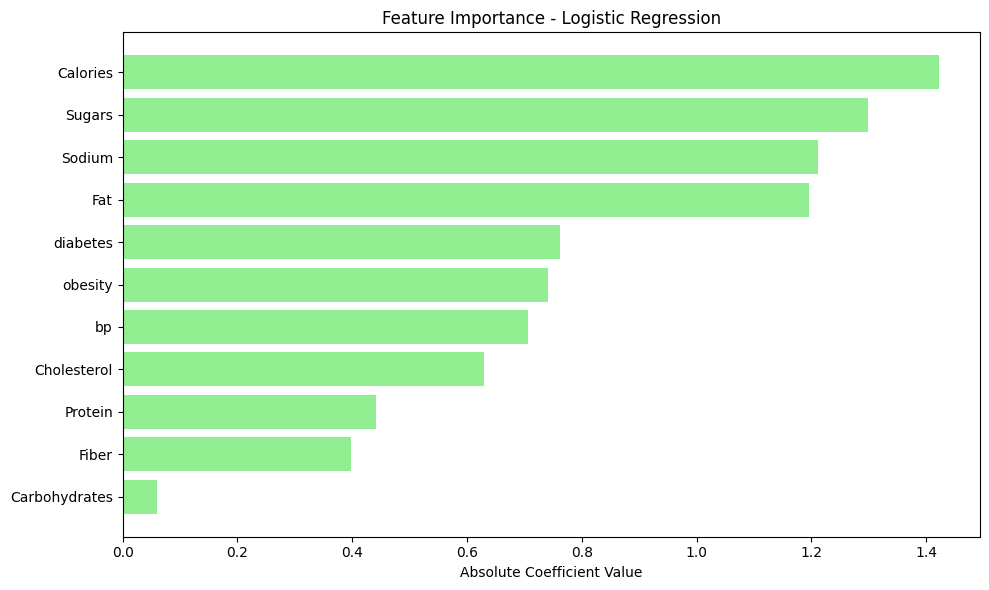

In [32]:
# Get coefficients from the model (1D array for binary classification)
coefficients = model.coef_[0]

# Match coefficients with feature names
feature_names = X.columns  # same columns you trained on
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
}).sort_values(by='Absolute Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Absolute Importance'], color='lightgreen')
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance - Logistic Regression")
plt.tight_layout()
plt.show()


In [33]:
print(pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]}))


          Feature  Coefficient
0        Calories    -1.422596
1         Protein     0.442066
2   Carbohydrates    -0.059812
3             Fat    -1.196616
4           Fiber     0.397358
5          Sugars    -1.297850
6          Sodium    -1.211060
7     Cholesterol    -0.630193
8        diabetes    -0.762864
9         obesity    -0.741339
10             bp    -0.705456


In [40]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probabilities for class 1
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [38]:
roc_auc

0.9215189318686455

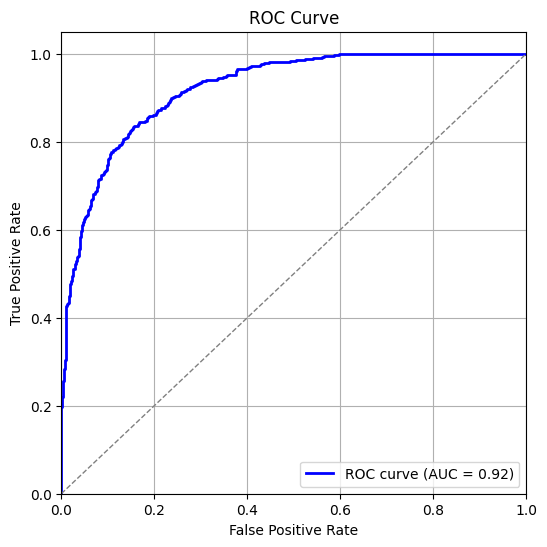

In [41]:
# Compute ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()